In [2]:
import numpy as np
import math
import matplotlib.pyplot as plt

ddu=(-1/4)pi**2(u+1)  
> u(0)=0;u(1)=1  

du=y ; dy=(-1/4)pi**2(u+1)  
U(x)=cos(pi*x/2)+2sin(pi\*x/2)-1  

# Shooting Method

In [3]:
def fAnalysis(x):
    return math.cos(math.pi*x/2)+2*math.sin(math.pi*x/2)-1
def df(x):
    return -math.pi/2*math.sin(math.pi*x/2)+math.pi*math.cos(math.pi*x/2)

def duy(x,y,u):
    du = y
    dy = (-1/4)*(math.pi**2)*(u+1) #ddu = dy
    return[du,dy]
def kOf4thRK(x,y,u,h):
    k1 = duy(x=x, y=y,u=u)
    k2 = duy(x+(h/2)*k1[0], y+(h/2)*k1[1], u+(h/2)*k1[0])
    k3 = duy(x+(h/2)*k2[0], y+(h/2)*k2[1], u+(h/2)*k2[0])
    k4 = duy(x+h*k3[0], y+h*k3[1], u+h*k3[0])
    uVar = u+(h/6)*(k1[0]+2*k2[0]+2*k3[0]+k4[0])
    yVar = y+(h/6)*(k1[1]+2*k2[1]+2*k3[1]+k4[1])
    return [uVar,yVar]
def fRungeKutte(guessdu,h):
    xVars = np.arange(0,1+h,h)
    uVars = np.zeros_like(xVars)
    yVars = np.zeros_like(xVars)
    uVars[0]=0
    yVars[0]=guessdu
    for i in np.arange(1,xVars.__len__()):
        uy=kOf4thRK(uVars[i-1],yVars[i-1],uVars[i-1],h)
        uVars[i]=uy[0]
        yVars[i]=uy[1]
    fVars = np.cos(np.pi*xVars/2)+2*np.sin(np.pi*xVars/2)-1
    return [xVars,uVars,fVars]


error: 2.55351295663786e-15
all test du(0): [0.0, 1, 3.141592653589667]


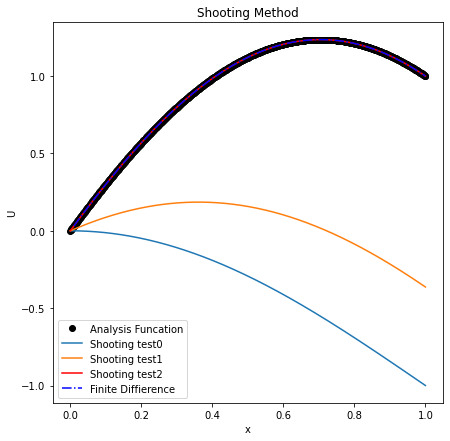

In [71]:
u1=1
temp=(u1-1)/1
fShooting=fRungeKutte(temp,0.001)
tempdu=fShooting[1][-1]
tempt=temp
temp=1
fShooting=fRungeKutte(temp,0.001)
error = math.fabs(fShooting[1][-1]-u1)
templist=[tempt,temp]
while error>1e-5 :
    temp = temp+(temp-tempt)*(u1-fShooting[1][-1])/(fShooting[1][-1]-tempdu)
    templist.append(temp)
    fShooting = fRungeKutte(temp, 0.001)
    error = math.fabs(fShooting[1][-1]-u1)
    print('error:',error)
print('all test du(0):',templist)

f0 = fRungeKutte(templist[0],0.001)
f1 = fRungeKutte(templist[1],0.001)
f2 = fRungeKutte(templist[2],0.001)

fig = plt.figure(figsize=(7, 7))
plt.plot(f0[0], f0[2], 'ok', label='Analysis Funcation')
plt.plot(f0[0], f0[1], '-',label='Shooting test0')
plt.plot(f1[0], f1[1], '-', label='Shooting test1')
plt.plot(f2[0], f2[1], '-r', label='Shooting test2')
##plt.plot(fF0[0],fF0[1],'-.b',label='Finite Diffierence')
plt.legend()
plt.ylabel('U')
plt.xlabel('x')
plt.title('Shooting Method')
plt.savefig('Boundary.jpeg',dpi=200)
plt.show()


# Finite differences

Text(0.5, 1.0, 'Finite Differences Method')

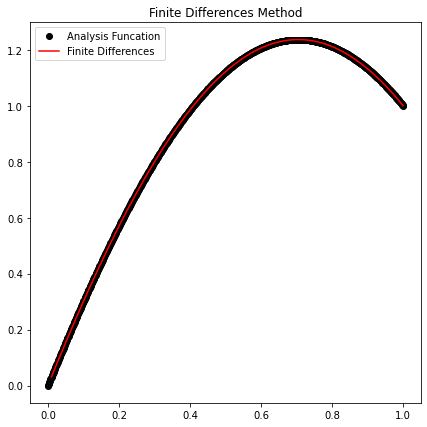

In [69]:
def fFD(ub,n):  #ub=[u0,u1]边值条件
    u0=ub[0]
    u1=ub[-1]
    n=n-2 # 未知点 x=0,x=1已知 i=0,i=n的值已知
    h=1/(n+2)
    xVar=np.arange(0+h,1,h) ## 从i=1到i=n-1
    aCoefficient=np.full(n,1)
    bCoefficient=np.full(n+1,(math.pi**2)*h*h/4-2)
    cMatrix = np.diag(aCoefficient,k=-1)+np.diag(bCoefficient,k=0)+np.diag(aCoefficient,k=1)
    uMatrix=np.full_like(xVar,-(math.pi**2)*h*h/4)
    uMatrix[0]=uMatrix[0]-aCoefficient[0]*u0
    uMatrix[-1]=uMatrix[-1]-aCoefficient[0]*u1
    fVar=np.linalg.solve(cMatrix,uMatrix)
    xVar=np.append(xVar,1)
    fVar=np.append(fVar,u1)
    return [xVar,fVar]

fF0=fFD([0,1],100)

fig=plt.figure(figsize=[7,7])
plt.plot(f0[0], f0[2], 'ok', label='Analysis Funcation')
plt.plot(fF0[0], fF0[1],'r',label='Finite Differences')
plt.legend()
plt.title('Finite Differences Method')